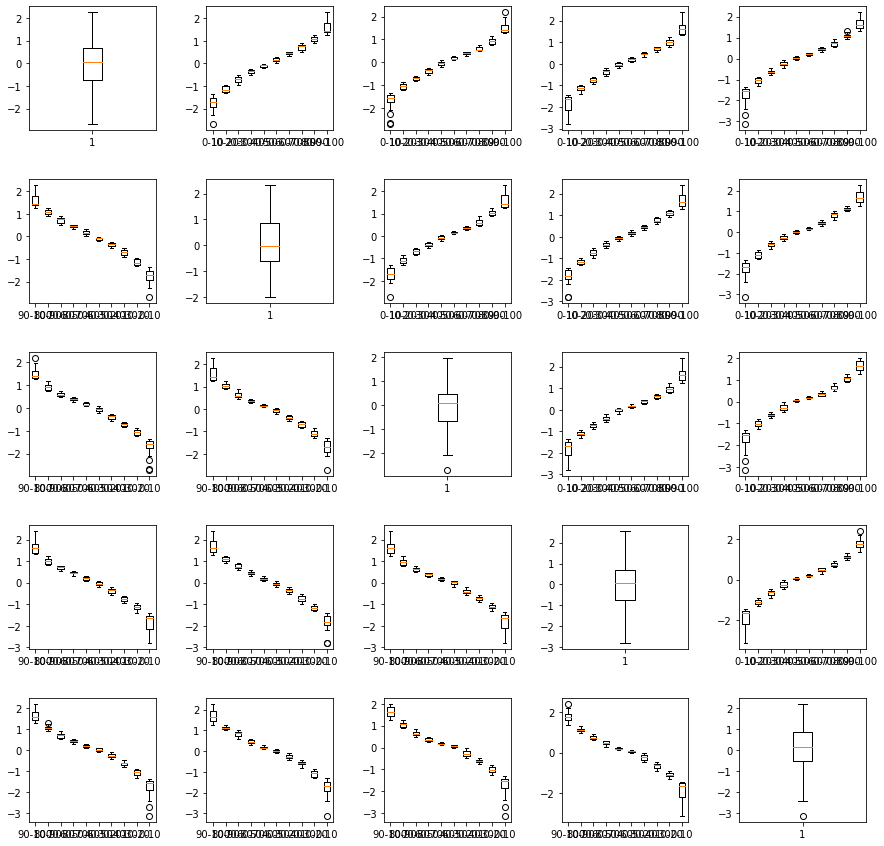

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 生成5个包含随机数据的数组
data = [np.random.randn(100) for i in range(5)]

# 将5个数组中的数据按照10%分位数进行分组（每前10%为一组），并绘制箱线图
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        if i == j:
            # 对角线上的子图，绘制整个数组的箱线图
            axs[i,j].boxplot(data[i])
        elif i < j:
            # 上三角的子图，将两个数组的数据合并后，按照10%分位数进行分组，并绘制箱线图
            combined_data = np.concatenate((data[i], data[j]))
            group_labels = ['{}-{}'.format(int(p*100), int((p+0.1)*100)) for p in np.arange(0, 1, 0.1)]
            groups = [combined_data[np.logical_and(combined_data>=np.percentile(combined_data, p*100),
                                                    combined_data<np.percentile(combined_data, (p+0.1)*100))] 
                      for p in np.arange(0, 1, 0.1)]
            axs[i,j].boxplot(groups, labels=group_labels)
        else:
            # 下三角的子图，与上三角对称
            combined_data = np.concatenate((data[i], data[j]))
            group_labels = ['{}-{}'.format(int(p*100), int((p+0.1)*100)) for p in np.arange(0, 1, 0.1)]
            groups = [combined_data[np.logical_and(combined_data>=np.percentile(combined_data, p*100),
                                                    combined_data<np.percentile(combined_data, (p+0.1)*100))] 
                      for p in np.arange(0, 1, 0.1)]
            axs[i,j].boxplot(groups, labels=group_labels)
            axs[i,j].invert_xaxis()
            
# 设置子图间距
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# 显示图形
plt.show()
